## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja logistyczna

Perceptron bazujący na modelu sztucznego neuronu jest dobrym algorytmem, aby wyrobić sobie pewną intuicję, jednak nie jest on powszechnie stosowany do rozwiązywania problemów klasyfikacji. Głównym problemem jest wykorzystywana w nim funkcja aktywacji oraz, w konsekwencji, sposób uczenia. Funkcja skokowa Heaviside'a jest nieróżniczkowalna w punkcie $x=0$, a jej pochodna wynosi $0$ w każdym innym punkcie. Powoduje to, że metody gradientowe (w tym metoda gradientu prostego) nie mogą być stosowane do optymalizacji wag. Wiele algorytmów, w tym implementowana regresja liniowa, wykorzystuje metody gradientowe do optymalizacji. Aby to było możliwe w przypadku perceptronu, należy zmienić funkcję aktywacji na taką, która będzie różniczkowalna w każdym punkcie.

### Funkcja sigmoidalna

Funkcją, która spełnia powyższe wymagania jest funkcja sigmoidalna, zwana również funkcją logistyczną. Dana jest wzorem:

$$f(x) = \frac{1}{1+e^{-x}}$$

Poniższy obraz przedstawia wykres funkcji sigmoidalnej.

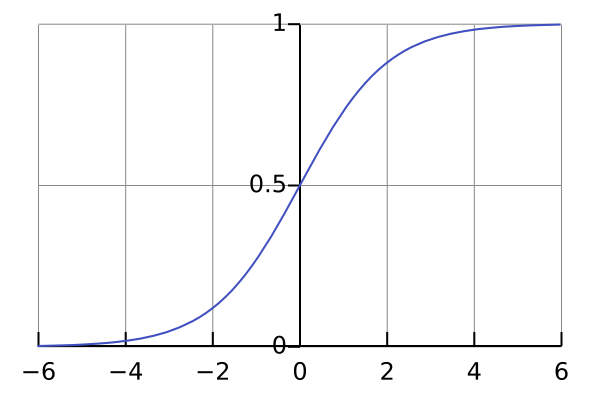

Tak jak w przypadku funkcji skokowej Heaviside'a, funkcja mapuje dowolną wartość rzeczywistą na wartości z przedziału $(0,1)$. Wartość funkcji może być rozumiana jako prawdopodobieństwo wyniku pozytywnego. Przykładowo, jeśli $f(x) = 0.9$, to prawdopodobieństwo $1$ jest równe $90\%$. Czyli jeśli mamy problem klasyfikacji binarnej, a $1$ oznacza np. obecność wirusa grypy w organiźmie, to możemy powiedzieć, że na $90\%$ jesteśmy chorzy na grypę. Warto również zauważyć, że funkcja logistyczna zmierza do $1$ dla wartości dodatnich, a dla wartości ujemnych zmierza do $0$. Zmiana predykcji jest w punkcie $0$, gdzie wartość funkcji wynosi $0.5$.

Zaletą funkcji sigmoidalnej jest łatwa do obliczenia pochodna:

$$f(x)' = f(x)(1-f(x))$$

Algorytm, który wykorzystuje tę funkcję aktywacji nazywany jest **regresją logistyczną**. Nazwa może być myląca i może sugerować, że służy on do rozwiązywania problemów regresji, ale w rzeczywistości wykorzystywany jest do problemów klasyfikacji.

Finalnie, nasza hipoteza będzie wyglądać następująco.

$$h_w(x) = f(\sum_{i=0}^{n}{w_ix_i})$$

$$s = \sum_{i=0}^{n}{w_ix_i}$$

$$f(s) = \frac{1}{1+e^{-s}}$$

### Funkcja błędu

Poznaliśmy już jedną funkcję błędu, która wykorzystywana była do obliczenia błędu regresji liniowej (i wielomianowej). W przypadku regresji logistycznej nie możemy z niej skorzystać, ponieważ regresja logistyczna spowoduje, że taka funkcja będzie miała wiele lokalnych minimum, a co za tym idzie, znalezienie optymalnego zestawu wag będzie bardzo trudne. W związku z tym, konieczne jest znalezienie innej funkcji błędu. Powszechna funkcja błędu, która jest wykorzystywana w algorytmie regresji logistycznej ma następującą formę.

$$
Cost(h_w(x), y) =
\begin{cases}
-log(h_w(x))        &   \mathrm{if} \ y=1,\\
-log(1 - h_w(x))    &   \mathrm{if} \ y=0
\end{cases}
$$

Gdzie $y$ jest prawdziwą wartością.

<table>
    <tr>
        <td> 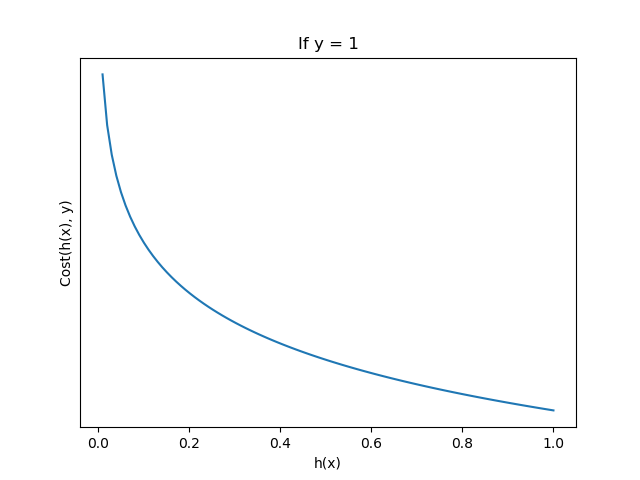 </td>
        <td> 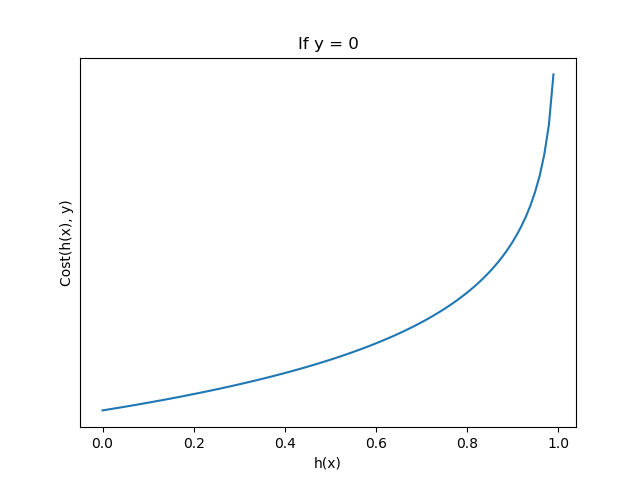 </td>
    </tr>
</table>

Czyli jeśli $y=0$, to funkcja kosztu będzie mieć wartość $0$, tylko jeśli hipoteza będzie mieć wartość $0$. Jeśli $h_w(x)$ zmierza do $1$, to funkcja kosztu zmierza do nieskończoności. 

Analogicznie, jeśli $y=1$, to funkcja kosztu będzie równa $0$ tylko, gdy hipoteza będzie równa $1$. Jeśli $h_w(x)$ będzie zmierzać do $0$, to wartość funkcji kosztu będzie zmierzać do nieskończoności.

Zapis powyższej funkcji błędu może zostać uproszczony do jednego równania:

$$Cost(h_w(x), y) = -y\:log(h_w(x)) - (1 - y)\:log(1 - h_w(x))$$

Dlaczego można tak zrobić? Zauważmy, że jeśli $y=0$, to pierwsza część równania się zeruje, zostaje jedynie druga. Natomiast jeśli $y=1$, to zeruje się druga część równania, zostawiając jedynie pierwszą.

### Trenowanie modelu

Wzór na funkcję błędu dla regresji logistycznej można zapisać jako:

$$J(w) = \frac{1}{m} \sum_{i=1}^{m}Cost(h_w(x^{(i)}),y^{(i)}) = - \frac{1}{m} [\sum_{i=1}^{m} y^{(i)} log(h_w(x^{(i)})) + (1 - y^{(i)}) log(1 - h_w(x^{(i)}))]$$

Dobór wag przeprowadzony zostanie z wykorzystaniem algorytmu gradientu prostego. Tak jak w przypadku algorytmu regresji liniowej, w każdej epoce obliczone zostaną nowe wagi, które powinny skutkować zmniejszeniem błędu. W algorytmie perceptronu wagi akutalizowane były po każdej próbce uczącej, natomiast tutaj po jednym przejściu zestawu uczącego. Istnieją różne warianty ilości próbek, po których wagi są aktualizowane, jednak dla uproszczenia wybieramy cały zbiór.

Dobra wiadomość jest taka, że proces aktualizacji wag wygląda praktycznie identycznie, jak miało to miejsce w przypadku algorytmu regresji liniowej. Pochodna funkcji błędu dla $j$-tej wagi ma postać: 

$$\frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum^{m}_{i=1} (h_w(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

Zatem wagi akutalizujemy tak, jak robiliśmy to uprzednio:

$$w_j = w_j - \alpha \frac{\partial J(w)}{\partial w_j} = w_j - \frac{\alpha}{m} \sum^{m}_{i=1} (h_w(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

Proces aktualizacji wag wynika bezpośrednio z obliczenia pochodnej funkcji błędu względem wag. W tym notatniku nie będziemy przechodzić przez cały ten proces. Dla osób, które chcą poznać matematyczne detale, przekształcenia opisane są np. [tutaj](https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17).

_Powyższy zapis jest w formie iteracyjnej, a w notaniku z regresją liniową był w formie macierzowej. Te dwa zapisy są równoznaczne i warto znać i rozumieć obie formy._

### Regresja logistyczna a perceptron

Powyższy algorytm w formie z sigmoidalną funkcją aktywacji bardzo często wykorzystywany jest jako podstawowy element wielowarstwowych sieci neuronowych. Jego dobre zrozumienie znacznie ułatwi zrozumienie sposobu działania sieci neuronowych. Porównując ze sobą działania algorytmu regresji logistycznej, a wcześniej implementowanego perceptronu, na pojedynczych neuronach nie widać róznic. Obie implementacje służą do rozwiązywania problemów klasyfikacji w zbiorach liniowo separowalnych. Ich celem jest wyznaczenie prostej separującej próbki pochodzące z różnych klas. Różnica pojawia się w momencie, gdy chcemy stworzyć strukturę złożoną z wielu neuronów. Wykorzystanie w tym celu perceptronu nie jest możliwe, ponieważ sieci neuronowe trenowane są najcześciej z wykorzystaniem algorytmu opartego o obliczenie gradientu funkcji błędu.

Struktury złożone z wielu neuronów mogą rozwiązywać problemy nieliniowo separowalne. Daje to duże możliwości i tłumaczy duże zainteresowanie sieciami neuronowymi. Innym sposobem na rozwiązanie problemu nieliniowo separowalnego może być rozwinięcie hipotezy o wielomianową formę, tak jak robiliśmy to w przypadku regresji wielomianowej.

### Zadanie 1

Zaimplementuj opisany algorytm regresji logistycznej, który będzie skutecznie klasyfikował próbki z liniowo separowalnego zestawu danych. 

In [252]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

def calculationOfWagesSum(wages, X):
    return np.sum(wages * X)

def activation_function(suma):
    result = 1/(1 + math.exp(-suma))
    decision = 0
    if (result >= 0.5):
        decision = 1
    return result, decision

def updateWeights(w, x, predictions, y, alpha):
    weights = []
    for j in range(len(w)):
        calc_sum = 0
        for i in range(len(x)):
            calc_sum = calc_sum + (predictions[i] - y[i]) * x[i][j]
        wj = w[j] - alpha * (calc_sum / len(x))
        weights.append(wj)
    return weights

def countError(predict, Y):
    globalError = 0;
    for i in range(len(Y)):
        globalError += Y[i] * math.log(predict[i]) + (1 - Y[i]) * math.log(1 - predict[i])
    globalError *= -(1/len(Y))
    return globalError

def perceptronAlgorythm(X, Y, alpha):
    globalError = []
    w_start = [random.uniform(-1,1) for _ in range(X[0].shape[0] + 1)]
    wages = [w_start]
    condition = True
    epoch = 0
    while condition:
        predictions = []
        results = []
        errors = 0
        for j in range(len(X)):
            sum_of_wages = calculationOfWagesSum(wages[-1], np.concatenate(([1], X[j])))
            result, prediction = activation_function(sum_of_wages)
            predictions.append(prediction)
            results.append(result)
            errors += 0 if Y[j] == prediction else 1
        
        globalError.append(countError(results, Y))
        X_array = [np.concatenate(([1], X[j])) for j in range(len(X))]
        new_wage = updateWeights(wages[-1], X_array, predictions, Y, alpha)
        wages.append(new_wage)

        epoch += 1
        errors = errors / len(X)
        if errors == 0 or epoch == 2000:
            condition = False
    return wages, globalError

### Zadanie 2

Wczytaj zbiór danych znajdujący się w pliku Ankieta.csv, stwórz wykres próbek. Następnie stwórz 3 wykresy na których przedstawisz jak zmieniała się granica decyzyjna zaimplementowanego algorytmu regresji logistycznej na przestrzeni epok. Porównaj wynik z algorytmem perceptronu.

**Uwaga:** Przed podaniem danych na wejście klasyfikatora należy je znormalizować. Zbyt duże wartości powodują, że logarytmy liczą się niepoprawnie (log(0) daje NaN). Dla zainteresowanych wyjaśnienie dostępne jest [tutaj](https://stackoverflow.com/questions/35419882/cost-function-in-logistic-regression-gives-nan-as-a-result)

Czas trwania:  0.04567575454711914
Perwsza Epoka


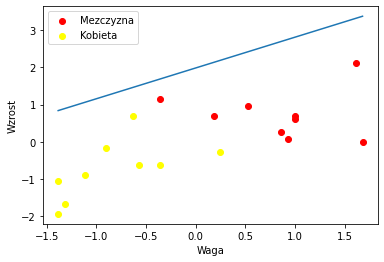

Srodkowa epoka: 52


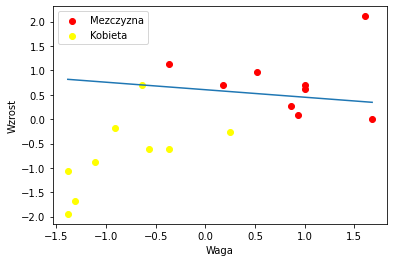

Ostatnia Epoka: 103


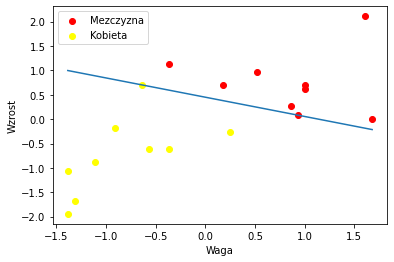

102


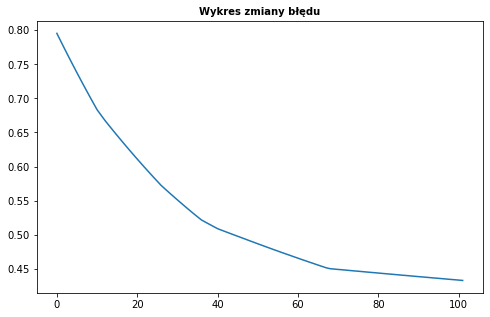

In [300]:
import time

def draw(X, Y, w, tittle):
    print(tittle)
    x1 = np.linspace(min(X[:,0]), max(X[:,0]), 2)
    x2 = -(w[1] * x1 + w[0]) / w[2]
    x1_0, x2_0 = [], []
    x1_1, x2_1 = [], []
    for i in range(X[:,0].shape[0]):
        if Y[i] == 0:
            x1_0.append(X[i][0])
            x2_0.append(X[i][1])
        else:
            x1_1.append(X[i][0])
            x2_1.append(X[i][1])
    plt.scatter(x1_1, x2_1, c='red', label='Mezczyzna')
    plt.scatter(x1_0, x2_0, c='yellow', label='Kobieta')
    plt.plot(x1, x2)
    plt.xlabel("Waga")
    plt.ylabel("Wzrost")
    plt.legend()
    plt.show()

def loadData():
    df = pd.read_csv('datasets/Ankieta.csv', sep=',')
    plec = df['Plec'].values.reshape(df['Plec'].shape[0], 1)
    Y = []
    for i in plec: Y.append(1 if i == "Mezczyzna" else 0)
    wzrost = df['Wzrost'].values.reshape(df['Wzrost'].shape[0], 1)
    waga = df['Waga'].values.reshape(df['Waga'].shape[0], 1)
    return np.hstack((waga, wzrost)), Y
    
X, Y = loadData()
X = preprocessing.StandardScaler().fit_transform(X)
start = time.time()
wages_predict, err = perceptronAlgorythm(X, Y, 0.03)
end = time.time()
epochs = len(wages_predict)
print("Czas trwania: ",end-start)
draw(X, Y, wages_predict[0], "Perwsza Epoka")
draw(X, Y, wages_predict[int(epochs/2)], "Srodkowa epoka: "+str(round(epochs/2)))
draw(X, Y, wages_predict[-1], "Ostatnia Epoka: "+str(epochs))

ax = plt.figure(figsize=(8,5)).add_subplot(111)
ax.set_title('Wykres zmiany błędu', fontsize=10, fontweight='bold')
plt.plot(err)
print(len(err))

Algorytm regresji logistycznej poradził podobnie jak algorytm perceptronu nie miał problemów z wyznaczeniem grnicy decyzyjnej dla znormalizowanych danych, dobrze prezentuje to wykres zmiany błędy przedstawiony powyzej.

Porównując działąnia obu algorytmów klasyfikacji to regresja logistyczna potrzebuje podobnej ilości epok, nawet biorąc pod uwagę, że jedna epoka to przejście po wszystkich elementach zbioru.

Odnośnie czasu to zakladając wykoanie takiej samej liczby epok (gdzie jedna epoka to przejście po wszystkich elementach zbioru) to oba algorytmy dzilają podobnie (srednio dla 100 epok czas wynosi 0.045 s).

### Zadanie 3

Wykorzystaj stworzony algorym w celu znalezienia granicy decyzyjnej będącej płaszczyzną w trójwymiarowej przestrzeni. Zbiór danych znajduje się w pliku o nazwie 3D_perceptron.csv. Stwórz wykresy analogicznie jak w zadaniu 2. Porównaj wynik z algorytmem perceptronu.

Pierwsza epoka


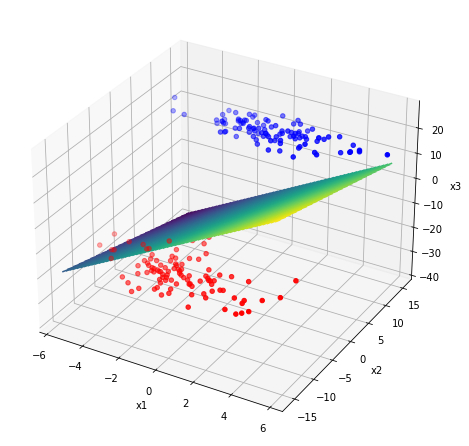

Srodkowa epoka: 4


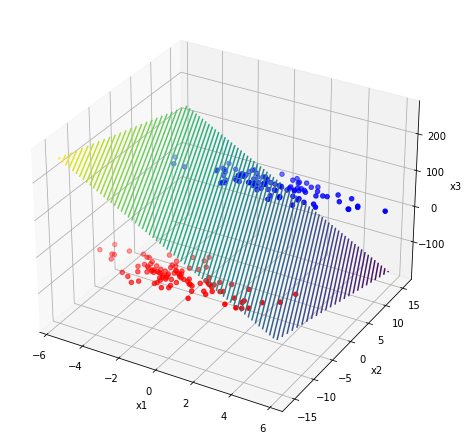

Ostatnia epoka: 9


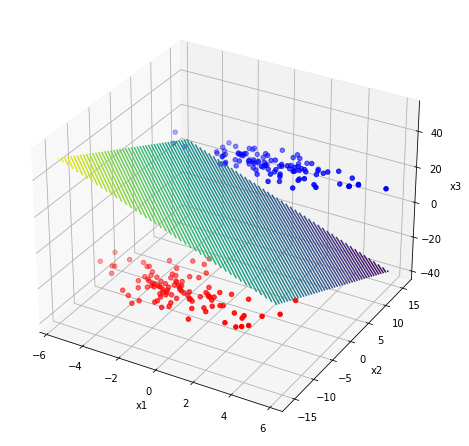

In [289]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
    
def draw3d(X, y, w, title):
    print(title)
    fig = plt.figure(figsize = (6,6))
    ax = Axes3D(fig)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    x1_0, x2_0, x3_0 = [], [], []
    x1_1, x2_1, x3_1 = [], [], []
    for i in range(len(y)):
        if y[i] == 0:
            x1_0.append(X[i][0])
            x2_0.append(X[i][1])
            x3_0.append(X[i][2])
        else:
            x1_1.append(X[i][0])
            x2_1.append(X[i][1])
            x3_1.append(X[i][2])
    ax.scatter(x1_0, x2_0, x3_0, c='red')
    ax.scatter(x1_1, x2_1, x3_1, c='blue')
    X, Y = np.meshgrid(np.hstack([min(X[:,0]), max(X[:,0])]), np.hstack([min(X[:,1]), max(X[:,1])]))
    Z = []
    for xy in np.stack((X, Y), axis=1):
        Z.append(-(w[1] * xy[0] + w[2] * xy[1] + w[0]) / w[3])
    ax.contour3D(X, Y, Z, 100)
    plt.show()

def loadData2():
    df = pd.read_csv('datasets/3D_perceptron.csv', sep=',')
    Y = df['y'].values.reshape(df['y'].shape[0], 1)
    x1 = df['x1'].values.reshape(df['x1'].shape[0], 1)
    x2 = df['x2'].values.reshape(df['x2'].shape[0], 1)
    x3 = df['x3'].values.reshape(df['x3'].shape[0], 1)
    return np.hstack((x1, x2,x3)), Y

X, Y = loadData2()
weights3D, err = perceptronAlgorythm(X, Y, 0.003)
epochs = len(weights3D)
draw3d(X, Y, weights3D[0], "Pierwsza epoka")
draw3d(X, Y, weights3D[int(epochs/2)], "Srodkowa epoka: "+str(round(epochs/2)))
draw3d(X, Y, weights3D[-1], "Ostatnia epoka: "+str(epochs))

Biorąc pod uwagę powyższe wyniku regresji logistycznej i perceptronu, opierających się na tym samym zestawie danych, można definitywnie stwierdzić, że zaimlemetowany powyżej algorytm dziala znacznie lepiej.

Dla perceptronu znalezienie granicy decyzyjnej dla modelu 3D srednio trwało okolo 300 epok, gdzie dla regresji logistyczne wyniki powyżej 10 epok są rzadkością.